# Metropolis Algorithm
<i>Statistical Rethinking</i>のP243にある<i>Metropolis Algorithm</i>のサンプルコードをPythonで書き直してみる．

まずは必要なパッケージの読み込み．

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

シミュレーションの回数（<i>num_weeks</i>）と結果を格納するためのオブジェクト（<i>positions</i>）を生成する．

In [2]:
num_weeks = int(1e5)
positions = np.zeros(num_weeks)

現在滞在している島の位置をランダムに決める．Numpyの<i>random.randint(a, b)</i>は<b>a以上，b未満</b>なので注意．

In [3]:
current = np.random.randint(1, 11)

<i>num_weeks</i>の数だけloopを回すが，Pythonのインデックスは0から始まることに注意する[1]．
[1]: range(num_weeks)のインデックスは0：(num_weeks-1)となるが，Rで同様の書き方となるseq(num_weeks)は1：num_weeksとなる．

In [4]:
for i in range(num_weeks):
    # record current position
    positions[i] = current
    
    # flip coin to generate proposal island
    proposal = current + np.random.choice([-1, 1])
    
    # make sure the king loops around the archipelago
    if proposal < 1:
        proposal = 10
    elif proposal > 10:
        proposal = 1
    
    # move?
    prob_move = proposal / current
    if np.random.rand() < prob_move:
        current = proposal

In [5]:
print(positions)

[ 1.  2.  1. ...,  3.  4.  3.]


(array([  1961.,   3964.,   5859.,   7442.,   9241.,  11008.,  12541.,
         14112.,  15907.,  17965.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

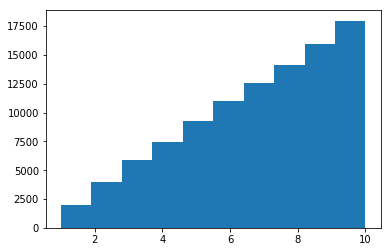

In [6]:
plt.hist(positions)